# 216 组合总和Ⅲ
输入：k，n  
输出：所有相加之和为n的k个数的组合，组合中只允许含有[1,9]的正整数，并且每种组合中的数字不能重复  

## 思路
其实就是在集合[1,2,3,4,5,6,7,8,9]中找到符合条件的集合，类似77.

树的宽度是9，深度为k（取k次数）  
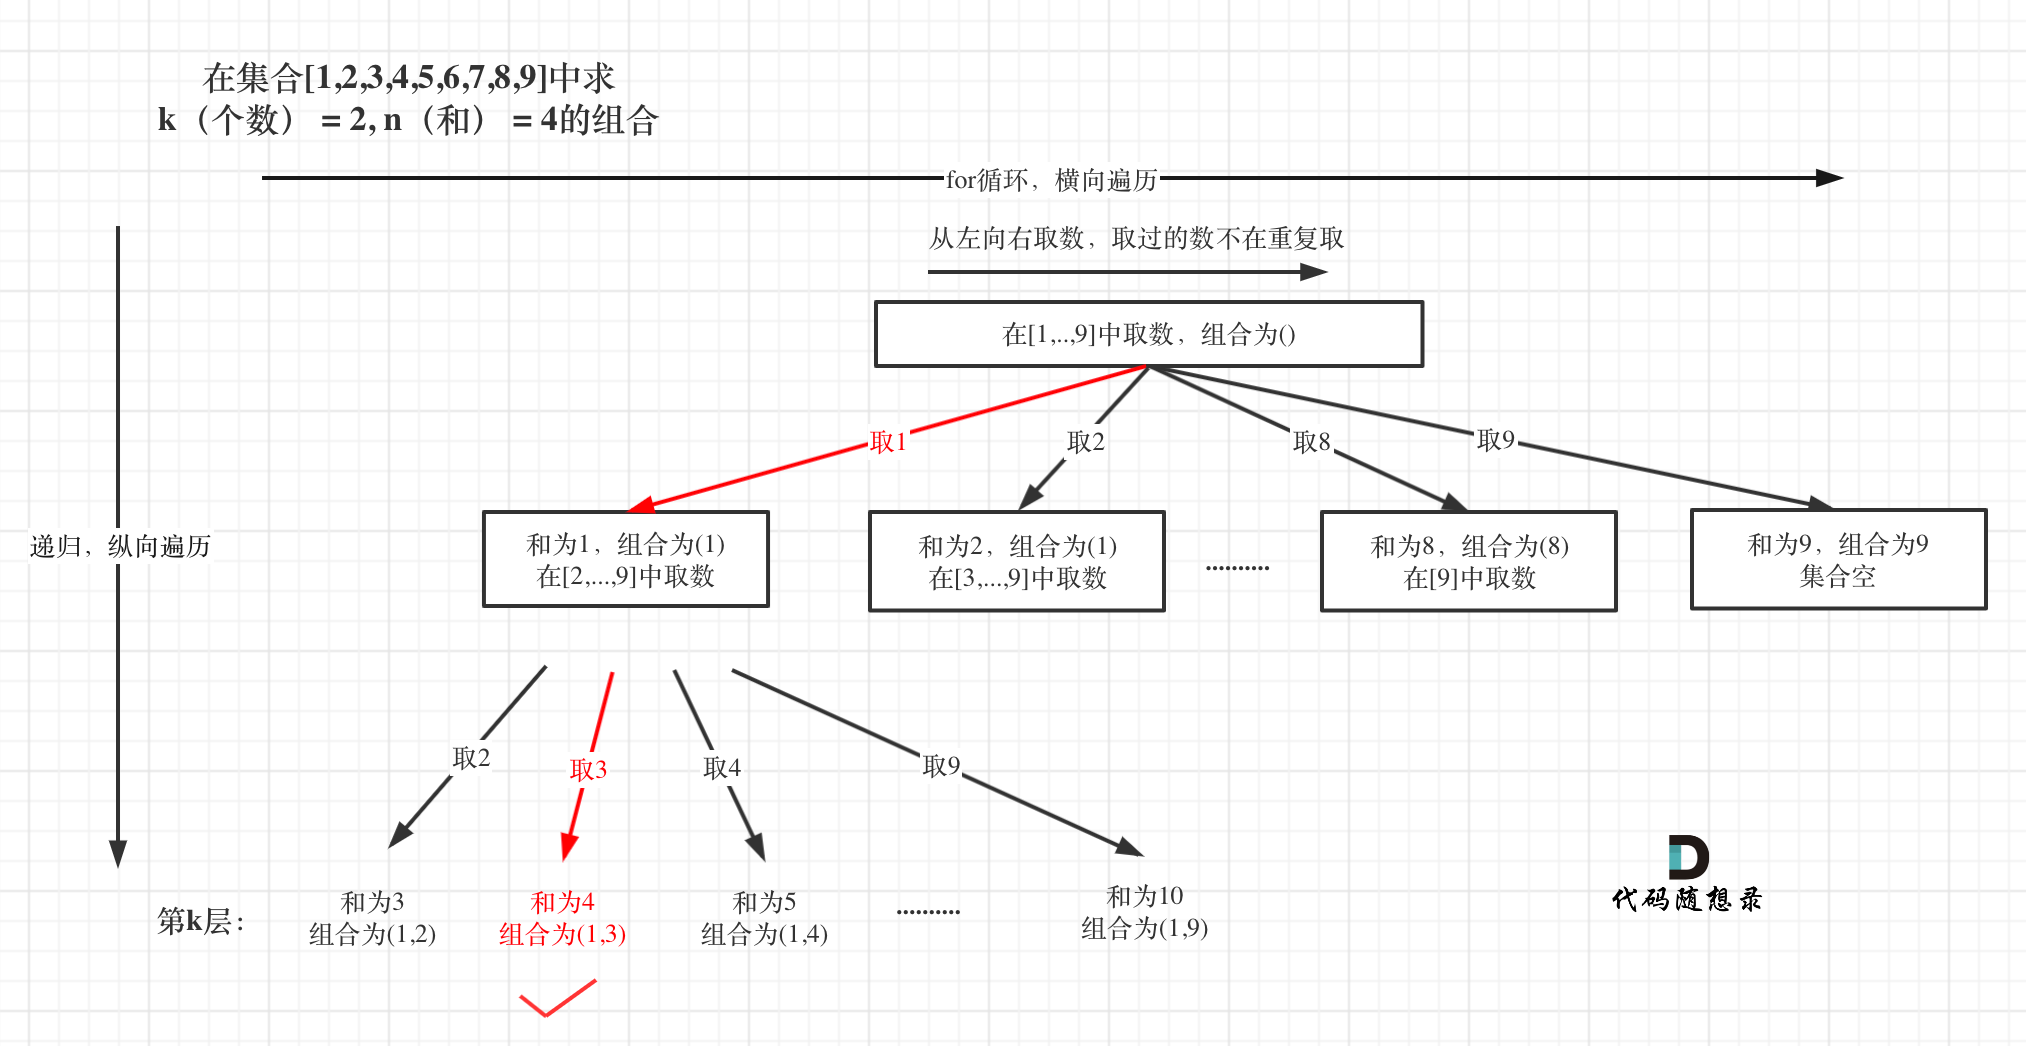

## 回溯三部曲
1. 参数和返回值
   - 参数：存放每次回溯中找到的符合条件的数组path，存放结果集合的二维数组result
   - 其他参数：目标和n，子集元素数目k，已收集的元素之和sum，下一层for循环搜索的起始位置startindex  
   - 返回值：无

2. 终止条件
   - k其实限制了树的深度，毕竟只需要k个数字
   - 所以如果 path的长度 == k 了就可以种植
   - 同时还要判断此时k个元素之和是否满足n，满足则直接返回

3. 单层遍历逻辑
   - 外层for循环可以固定为[1,9]
   - 内层取数过程：path收集每次处理的元素，同时维护一个元素之和sum便于后续取完k个数之后的比较  
   - 按照模板填充：先处理、再递归、最后回溯  

### 剪枝
如果此时子集中的元素之和 sum > n，则没有必要往后继续遍历了

当前子集中元素个数：len(path)  3  
还需要取出的元素个数：k - len(path)    5 - 3 = 2  
最多还要遍历的元素：n - (k - len(path))
加上起始位置，和python中range右开，遍历的右区间为n - (k - len(path)) +1 +1
当前起始的索引：startIndex   4
 


- 时间复杂度: O(n * 2^n)  
- 空间复杂度: O(n)

In [ ]:
class Solution:
    def combinationSum3(self, n:int, k:int) -> list[list[int]]:
        result = []
        self.backtracing(n, k, 0, 1, path, result)   # 最初startIndex=1, 遍历1 - 9
        return result

    def backtracing(self, targetSum, k, currentSum, startIndex, path, result):
        # 剪枝操作：判断当前和与目标和的大小，大于直接返回剪掉后续遍历
        if currentSum > targetSum:
            return

        # 终止条件：路径长度等于元素个数k时，先判断元素之和再返回
        if len(path) == k:
            if currentSum == targetSum: result.append(path[:])
            return

        # 单层遍历逻辑: 节点处理 - 递归遍历 - 回溯撤销
        for i in range(startIndex, 9 - (k - len(path)) + 2):   # 剪枝
            currentSum += i    # 当前节点处理
            path.append(i)
            self.backtracing(targetSum, k, currentSum, i+1, path, result)   # 当前节点处理完后，下一次开始的元素为 i+1
            currentSum -= i  # 回溯撤销，和节点处理一一对应
            path.pop()